<a href="https://colab.research.google.com/github/AishaEvering/ObjectDetection/blob/main/Black_Hair_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.7/107.7 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

# Get Data

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow
from roboflow import Roboflow

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata

roboflow_key = userdata.get('ROBO_FLOW_KEY')
rf = Roboflow(api_key=roboflow_key)

In [ ]:
WORK_SPACE = "aishas-workspace"
PROJECT = "black-hair-detection"

project = rf.workspace(WORK_SPACE).project(PROJECT)
version = project.version(1)

dataset = version.download("yolov8")
dataset

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Black-Hair-Detection-1 in yolov8:: 100%|██████████| 3388/3388 [00:01<00:00, 2374.14it/s]


# Train Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=train epochs=100 batch= 8 plots=True \
model=yolov8s.pt  \
data={dataset.location}/data.yaml

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=800)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=800)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=800)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

# Inference with Test Data

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

# Export Model into onnx

In [ ]:
!git clone https://github.com/ultralytics/ultralytics.git

In [ ]:
%cd ultralytics

In [ ]:
!yolo export model="/content/runs/detect/train3/weights/best.pt" imgsz=640 format=onnx opset=12

In [ ]:
!zip -r /content/train.zip "/content/runs/detect/train3"

In [ ]:
from google.colab import files
files.download("/content/train.zip")

In [ ]:
!pip -q install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.2 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/Udemy/Object_Detection/models/best.pt")
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [ ]:
# Export the model to ONNX format
model.export(format="onnx")  # creates 'yolov8n.onnx'

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/Udemy/Object_Detection/models/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (21.5 MB)

ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: export success ✅ 2.2s, saved as '/content/drive/MyDrive/Udemy/Object_Detection/models/best.onnx' (42.7 MB)

Export complete (6.6s)
Results saved to /content/drive/MyDrive/Udemy/Object_Detection/models
Predict:         yolo predict task=detect model=/content/drive/MyDrive/Udemy/Object_Detection/models/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/drive/MyDrive/Udemy/Object_Detection/models/best.onnx imgsz=640 data=/content/datasets/Black-Hair-Detection-1/data.yaml  
Visualize:       https://netron.app


'/content/drive/MyDrive/Udemy/Object_Detection/models/best.onnx'

In [ ]:
!yolo val task=detect model=/content/drive/MyDrive/Udemy/Object_Detection/models/best.onnx imgsz=640 data=/content/datasets/Black-Hair-Detection-1/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Loading /content/drive/MyDrive/Udemy/Object_Detection/models/best.onnx for ONNX Runtime inference...
Forcing batch=1 square inference (1,3,640,640) for non-PyTorch models
100% 755k/755k [00:00<00:00, 69.4MB/s]
val: Scanning /content/datasets/Black-Hair-Detection-1/valid/labels... 142 images, 1 backgrounds, 0 corrupt: 100% 142/142 [00:00<00:00, 1015.33it/s]
val: New cache created: /content/datasets/Black-Hair-Detection-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 156, len(boxes) = 157. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 142/142 [01:17<00:00,  1.82it/s]
                   all        142        157      0.926      0.892      

In [ ]:
# Load the exported ONNX model
onnx_model = YOLO("/content/drive/MyDrive/Udemy/Object_Detection/models/best.onnx")

# Run inference
results = onnx_model("/content/datasets/Black-Hair-Detection-1/test/images/01d8910855a49a73c5691455848c4ca9_jpg.rf.890f4d480a165e0c162f5617e03d6e68.jpg")

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify', or 'pose'.
Loading /content/drive/MyDrive/Udemy/Object_Detection/models/best.onnx for ONNX Runtime inference...

image 1/1 /content/datasets/Black-Hair-Detection-1/test/images/01d8910855a49a73c5691455848c4ca9_jpg.rf.890f4d480a165e0c162f5617e03d6e68.jpg: 640x640 1 sisterlocs, 507.1ms
Speed: 3.0ms preprocess, 507.1ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'afro', 1: 'bantu knots', 2: 'bob', 3: 'braids', 4: 'cornrows', 5: 'fade', 6: 'locs', 7: 'long', 8: 'sisterlocs', 9: 'twa'}
 orig_img: array([[[ 76, 100,  90],
         [ 76, 100,  90],
         [ 76, 100,  90],
         ...,
         [ 64,  77,  69],
         [ 66,  79,  71],
         [ 68,  81,  73]],
 
        [[ 76, 100,  90],
         [ 76, 100,  90],
         [ 76, 100,  90],
         ...,
         [ 64,  77,  69],
         [ 64,  77,  69],
         [ 65,  78,  70]],
 
        [[ 76, 100,  90],
         [ 76, 100,  90],
         [ 76, 100,  90],
         ...,
         [ 65,  78,  70],
         [ 65,  78,  70],
         [ 65,  78,  70]],
 
        ...,
 
        [[ 15,  15,   9],
         [ 16,  16,  10],
         [ 19,  19,  13],
         ...,
         [206, 223, 190],
         [204, 221, 188],
         [203, 220, 187]],
 
       

In [ ]:
import onnx
from onnxruntime.quantization import quantize_dynamic, QuantType

In [ ]:
!python -m onnxruntime.quantization.preprocess --input "/content/drive/MyDrive/Udemy/Object_Detection/models/best.onnx" --output "/content/drive/MyDrive/Udemy/Object_Detection/models/best-infer.onnx"

In [ ]:
model_fp32 = "/content/drive/MyDrive/Udemy/Object_Detection/models/best-infer.onnx"
model_quant = "/content/drive/MyDrive/Udemy/Object_Detection/models/best_quantized.onnx"

quantized_model = quantize_dynamic(model_fp32, model_quant, weight_type=QuantType.QUInt8)

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Udemy/Object_Detection/models/best_quantized.onnx imgsz=640 conf=0.25 source="/content/datasets/Black-Hair-Detection-1/test/images" save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Loading /content/drive/MyDrive/Udemy/Object_Detection/models/best_quantized.onnx for ONNX Runtime inference...

image 1/70 /content/datasets/Black-Hair-Detection-1/test/images/01d8910855a49a73c5691455848c4ca9_jpg.rf.890f4d480a165e0c162f5617e03d6e68.jpg: 640x640 1 sisterlocs, 525.4ms
image 2/70 /content/datasets/Black-Hair-Detection-1/test/images/080ae366787c60e575d1a4437ae1ed6a_jpg.rf.78ac4aaec38faa63c40fd09b8c1fb78a.jpg: 640x640 1 cornrows, 525.6ms
image 3/70 /content/datasets/Black-Hair-Detection-1/test/images/0b3db1d3ae5777e9baf81f02975893a0_jpg.rf.679534d0ac6192723b1e67056b19358a.jpg: 640x640 1 long, 494.5ms
image 4/70 /content/datasets/Black-Hair-Detection-1/test/images/0n6b7ewbirnl5s0utrr88zx5d6kttg5e_jpg.rf.b89c7f1dd9d738b703ceddb777468c8a.jpg: 640x640 1 afro, 502.9ms
image 5/70 /content/datasets/Black-Hair-Detection-1/test/images/11-braided-bun_jpg.rf.21035f66cfbae49b31ed3937aa5bd758.jpg: 640x6

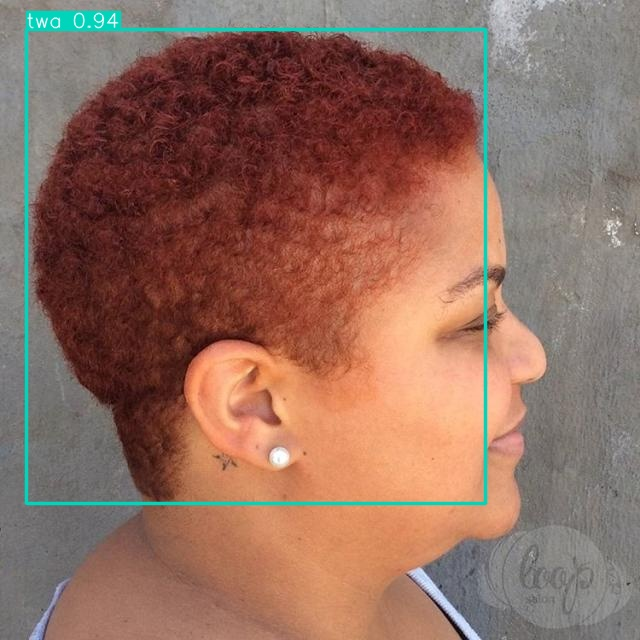

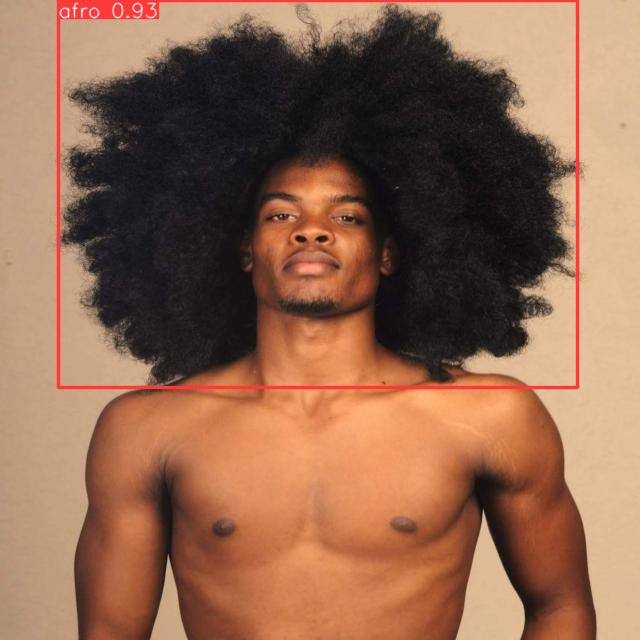

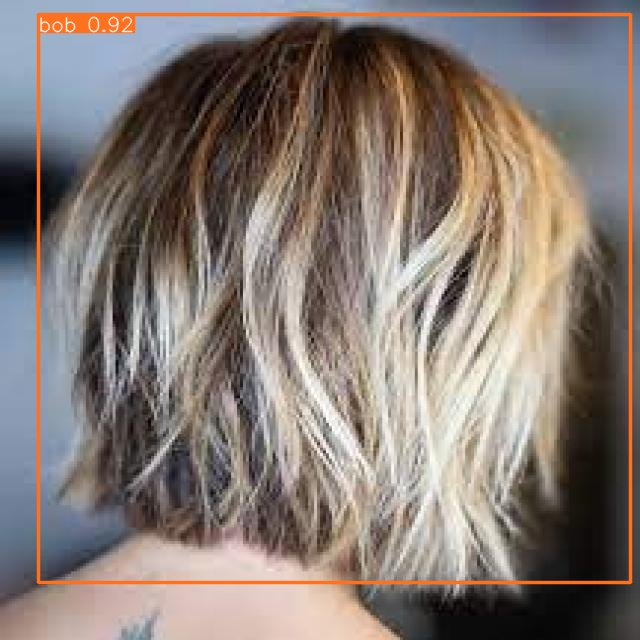

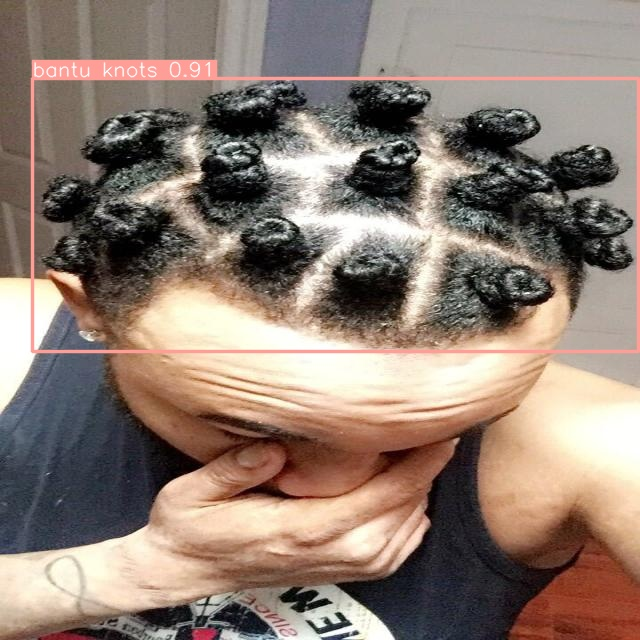

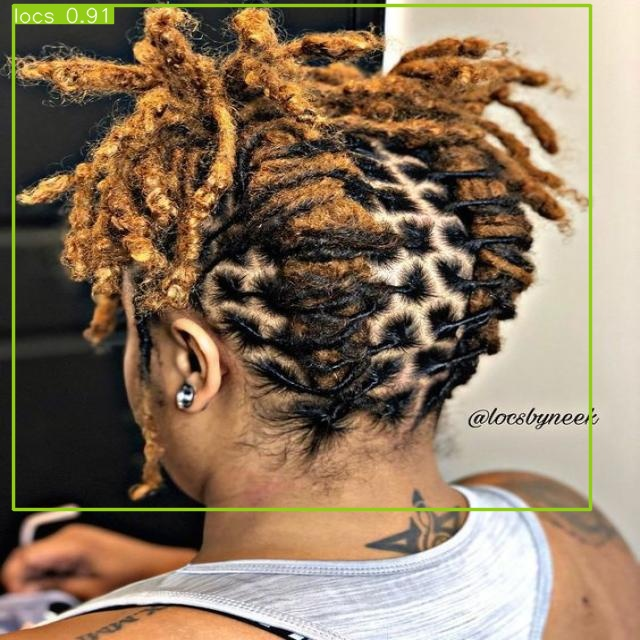

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/datasets/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:5]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
!yolo val task=detect model=/content/drive/MyDrive/Udemy/Object_Detection/models/best_quantized.onnx imgsz=640 data=/content/datasets/Black-Hair-Detection-1/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Loading /content/drive/MyDrive/Udemy/Object_Detection/models/best_quantized.onnx for ONNX Runtime inference...
Forcing batch=1 square inference (1,3,640,640) for non-PyTorch models
val: Scanning /content/datasets/Black-Hair-Detection-1/valid/labels.cache... 142 images, 1 backgrounds, 0 corrupt: 100% 142/142 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 156, len(boxes) = 157. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 142/142 [01:22<00:00,  1.71it/s]
                   all        142        157      0.943      0.874      0.938      0.849
                  afro        142         19       0.95      0.993      0.993      0.887
           

In [ ]:
import cv2
import numpy as np

img_path = "/content/datasets/Black-Hair-Detection-1/test/images/32-golden-blonde-bob-BeEwLq3jKOP_jpg.rf.448ffcfb14528dc5a4b5ca6d33a6a915.jpg"
test_image = cv2.imread(img_path)
test_image = cv2.resize(test_image, (640, 640))

# Load a model
model = YOLO("/content/drive/MyDrive/Udemy/Object_Detection/models/best_quantized.onnx")  # pretrained YOLOv8n model

# Run batched inference on a list of images
results = model([test_image], task="detect", mode="predict", show_conf=True)  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    probs = result.probs  # Probs object for classification outputs
    speed = result.speed
    confs = boxes.data[:, 4:6]

# print(boxes[0].conf)
# print(confs) # returns confidence and class id

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify', or 'pose'.
Loading /content/drive/MyDrive/Udemy/Object_Detection/models/best_quantized.onnx for ONNX Runtime inference...

0: 640x640 1 bob, 815.4ms
Speed: 3.5ms preprocess, 815.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
